   ## Importing Libraries

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import config

from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from PIL import Image
from IPython.display import display


%matplotlib inline

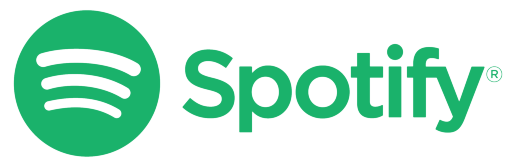

In [2]:
image = Image.open("Spotify_Logo.png")
plt.imshow(image)
plt.axis('off')
plt.show()

In [133]:
df= pd.read_csv("My_spotify_df.csv")



In [134]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.213,0.06560,7,-24.810,1,0.0467,0.99200,0.969000,0.0699,0.0384,65.023,audio_features,3U8Fx7zNTQrctytkj6Gqgd,spotify:track:3U8Fx7zNTQrctytkj6Gqgd,https://api.spotify.com/v1/tracks/3U8Fx7zNTQrc...,https://api.spotify.com/v1/audio-analysis/3U8F...,150147,3
1,0.330,0.00357,3,-33.142,1,0.0339,0.99500,0.953000,0.0989,0.1210,100.741,audio_features,6MzbO6YS0M6tjwT93hjAl0,spotify:track:6MzbO6YS0M6tjwT93hjAl0,https://api.spotify.com/v1/tracks/6MzbO6YS0M6t...,https://api.spotify.com/v1/audio-analysis/6Mzb...,216213,3
2,0.368,0.00363,1,-36.759,1,0.0350,0.99300,0.922000,0.1370,0.0850,69.363,audio_features,1L4NadMj3Jj7YgGaikyhfr,spotify:track:1L4NadMj3Jj7YgGaikyhfr,https://api.spotify.com/v1/tracks/1L4NadMj3Jj7...,https://api.spotify.com/v1/audio-analysis/1L4N...,254000,3
3,0.320,0.00501,1,-33.366,1,0.0455,0.99300,0.919000,0.0618,0.0383,68.947,audio_features,3hCPh4oVVjaM8tv9sFH8cx,spotify:track:3hCPh4oVVjaM8tv9sFH8cx,https://api.spotify.com/v1/tracks/3hCPh4oVVjaM...,https://api.spotify.com/v1/audio-analysis/3hCP...,294960,5
4,0.701,0.34100,1,-12.260,0,0.0418,0.49900,0.903000,0.3590,0.1630,105.513,audio_features,5xbuJuQsTVheVZvX2AJVIv,spotify:track:5xbuJuQsTVheVZvX2AJVIv,https://api.spotify.com/v1/tracks/5xbuJuQsTVhe...,https://api.spotify.com/v1/audio-analysis/5xbu...,151507,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,0.767,0.68200,1,-5.020,1,0.0420,0.01130,0.000160,0.1040,0.8330,127.975,audio_features,0C4ejWmOTMv8vuYj85mf8m,spotify:track:0C4ejWmOTMv8vuYj85mf8m,https://api.spotify.com/v1/tracks/0C4ejWmOTMv8...,https://api.spotify.com/v1/audio-analysis/0C4e...,243533,4
1844,0.708,0.64100,7,-4.271,1,0.0336,0.20500,0.000000,0.0925,0.2530,113.082,audio_features,0lupJBVy4UQrvI4Oy3PvI7,spotify:track:0lupJBVy4UQrvI4Oy3PvI7,https://api.spotify.com/v1/tracks/0lupJBVy4UQr...,https://api.spotify.com/v1/audio-analysis/0lup...,268120,4
1845,0.754,0.65200,11,-4.924,0,0.0308,0.17400,0.000000,0.1130,0.4740,95.006,audio_features,1FvOiE8MGWB8MUCAPvro3h,spotify:track:1FvOiE8MGWB8MUCAPvro3h,https://api.spotify.com/v1/tracks/1FvOiE8MGWB8...,https://api.spotify.com/v1/audio-analysis/1FvO...,192013,4
1846,0.825,0.83200,5,-5.853,0,0.0403,0.00587,0.000789,0.1140,0.7130,122.021,audio_features,6nCDnzErqalOaIY3EJM8NK,spotify:track:6nCDnzErqalOaIY3EJM8NK,https://api.spotify.com/v1/tracks/6nCDnzErqalO...,https://api.spotify.com/v1/audio-analysis/6nCD...,220627,4


### Creating a new df to train my KMEANS

In [135]:
X = df[['danceability', 'energy', 'key', 'loudness', "mode", 'speechiness', 'acousticness', 'instrumentalness', 'liveness', "valence" , "tempo"]]

In [136]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.213,0.06560,7,-24.810,1,0.0467,0.99200,0.969000,0.0699,0.0384,65.023
1,0.330,0.00357,3,-33.142,1,0.0339,0.99500,0.953000,0.0989,0.1210,100.741
2,0.368,0.00363,1,-36.759,1,0.0350,0.99300,0.922000,0.1370,0.0850,69.363
3,0.320,0.00501,1,-33.366,1,0.0455,0.99300,0.919000,0.0618,0.0383,68.947
4,0.701,0.34100,1,-12.260,0,0.0418,0.49900,0.903000,0.3590,0.1630,105.513
...,...,...,...,...,...,...,...,...,...,...,...
1843,0.767,0.68200,1,-5.020,1,0.0420,0.01130,0.000160,0.1040,0.8330,127.975
1844,0.708,0.64100,7,-4.271,1,0.0336,0.20500,0.000000,0.0925,0.2530,113.082
1845,0.754,0.65200,11,-4.924,0,0.0308,0.17400,0.000000,0.1130,0.4740,95.006
1846,0.825,0.83200,5,-5.853,0,0.0403,0.00587,0.000789,0.1140,0.7130,122.021


## ➡️ Train KMEANS

##  1. Scaling features

**K-Means is a distance based algorithm**: we need to scale / normalize!:


In [137]:
scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

# my x scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

display(X.head())

print()
display(X_scaled_df.head())




,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.213,0.06560,7,-24.810,1,0.0467,0.992,0.969,0.0699,0.0384,65.023
1,0.330,0.00357,3,-33.142,1,0.0339,0.995,0.953,0.0989,0.1210,100.741
2,0.368,0.00363,1,-36.759,1,0.0350,0.993,0.922,0.1370,0.0850,69.363
3,0.320,0.00501,1,-33.366,1,0.0455,0.993,0.919,0.0618,0.0383,68.947
4,0.701,0.34100,1,-12.260,0,0.0418,0.499,0.903,0.3590,0.1630,105.513


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-2.106568,-2.027035,0.511318,-2.250848,0.741846,-0.347172,1.872428,3.232389,-0.670567,-1.922220,-1.882001
1,-1.438175,-2.270282,-0.614587,-3.487886,0.741846,-0.537394,1.881349,3.172778,-0.514928,-1.615184,-0.621480
2,-1.221090,-2.270047,-1.177540,-4.024896,0.741846,-0.521047,1.875402,3.057280,-0.310450,-1.749001,-1.728839
3,-1.495303,-2.264636,-1.177540,-3.521143,0.741846,-0.365005,1.875402,3.046103,-0.714038,-1.922591,-1.743520
4,0.681259,-0.947066,-1.177540,-0.387570,-1.347989,-0.419991,0.406462,2.986491,0.880993,-1.459064,-0.453072


### Now, all features will have the same weight.

# 2. Chosing k

### ➡️ Appling the Elbow Method

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

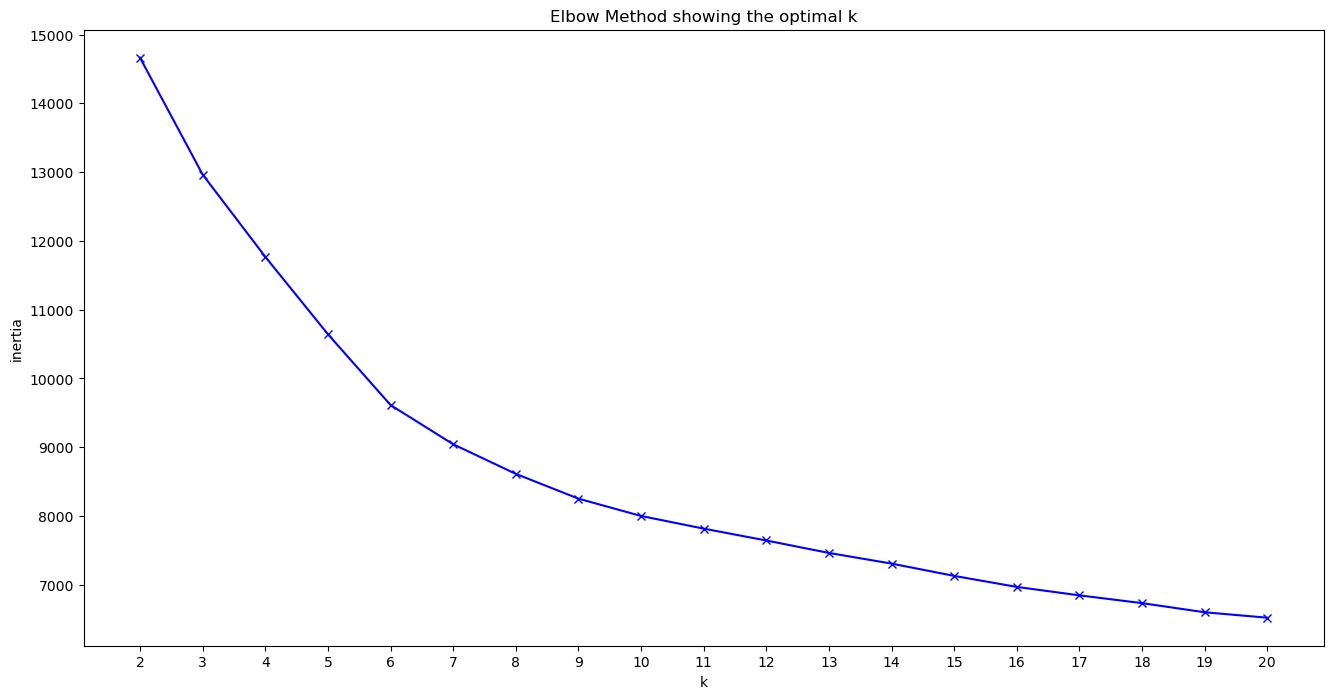

In [21]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There seems to be an elbow at **k=3**, and then a very slight one at k=10, but other than that the plot is quite smooth. What if our business needs involve having a k between 5 and 8?

There is another metric that will help us decide.

## ➡️ Appling the Silouhette Method

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

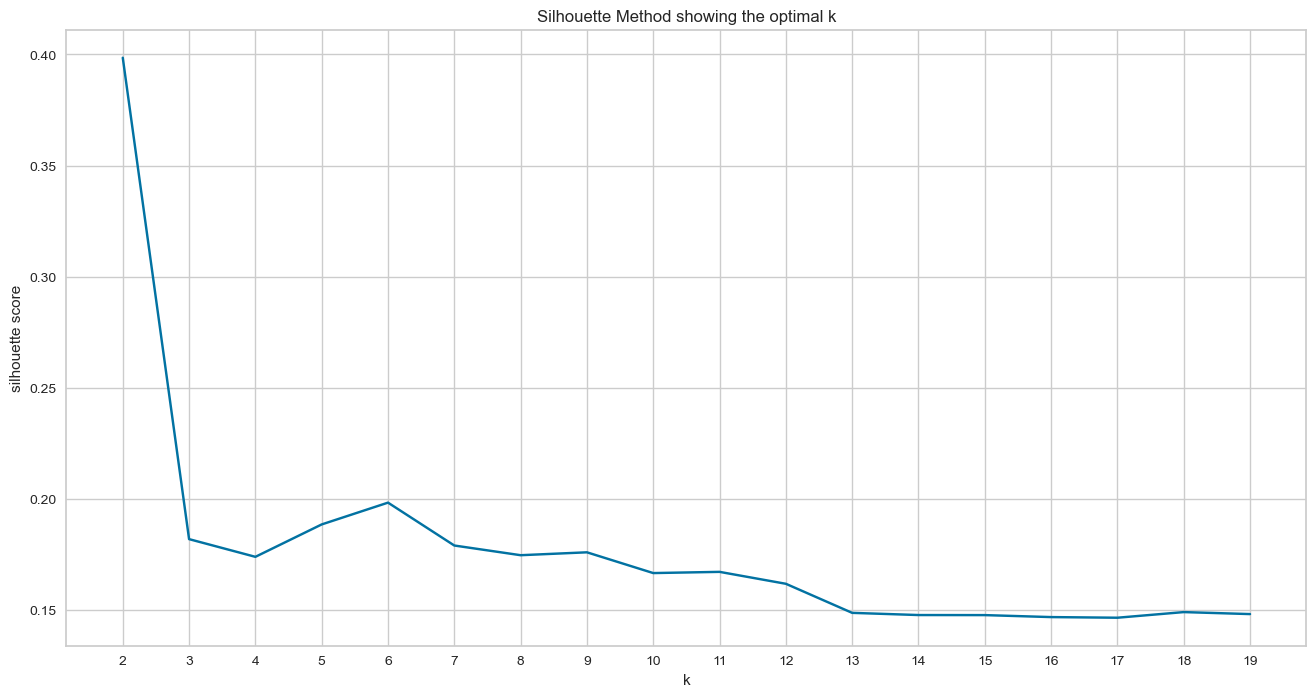

In [24]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

Optional

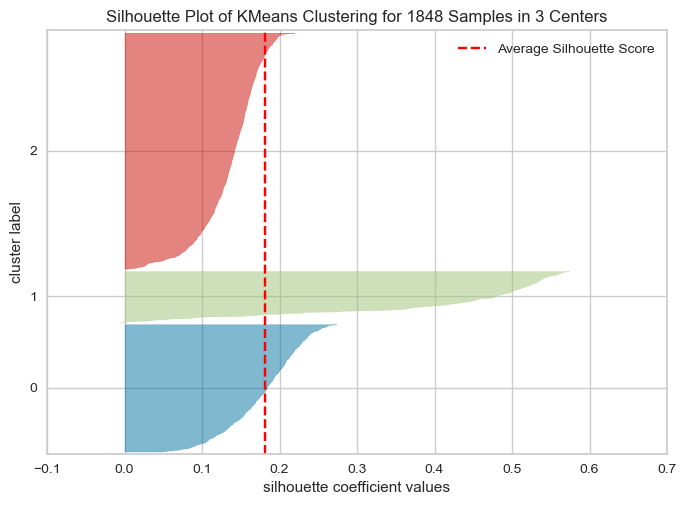

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1848 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

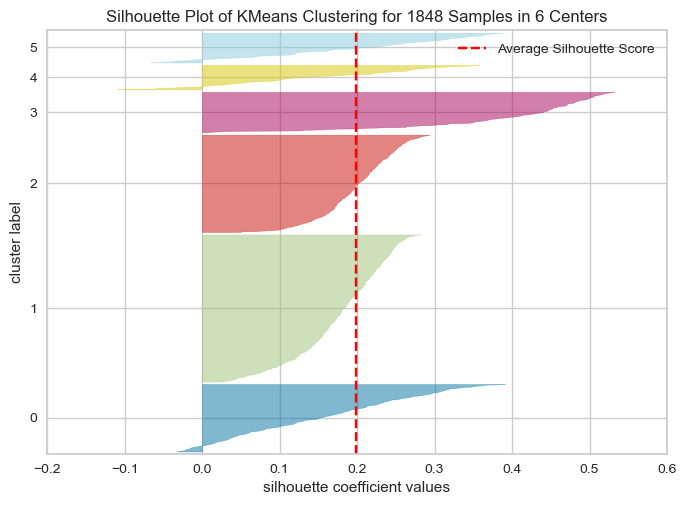

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1848 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

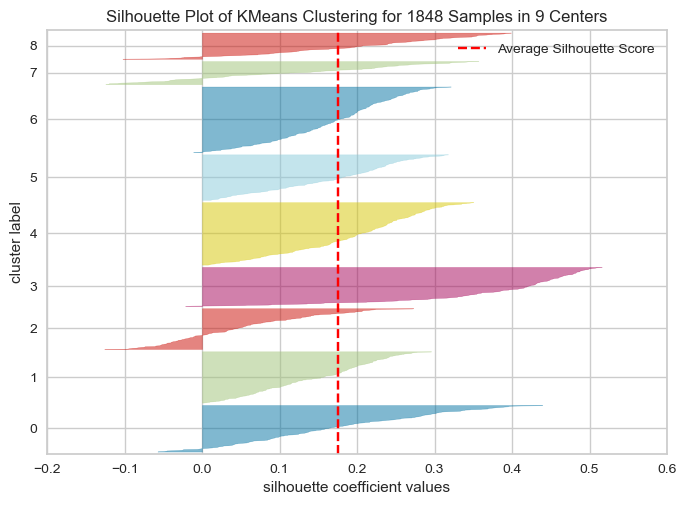

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1848 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(9, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## 3. Clustering the wines with K-Means


In [28]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=6, random_state=1234)

Let's get the labels

In [29]:
labels = kmeans.labels_
labels

array([3, 3, 3, ..., 5, 5, 2])

In [30]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5])

### Scatter Plot

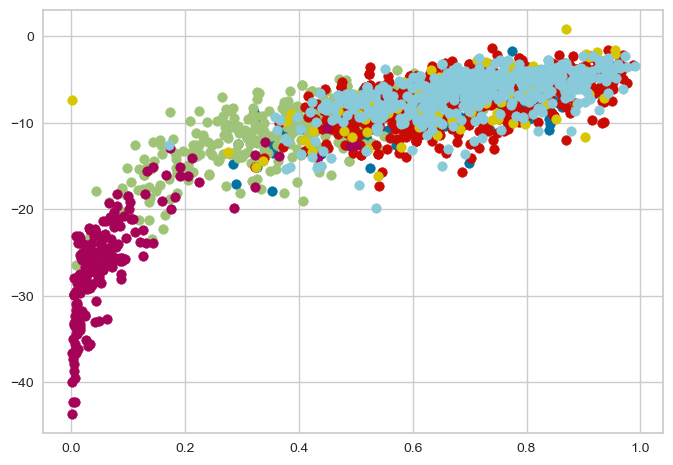

In [31]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

### Now we have our "model", let's get the clusters and how many observations has each cluster.

In [33]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    136
1    302
2    672
3    184
4    112
5    442
dtype: int64

In [34]:
clusters

array([3, 3, 3, ..., 5, 5, 2])

### Now let's see to which group was assigned every song 🎶🎵

In [35]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X

C:\Users\espan\AppData\Local\Temp\ipykernel_20040\3390344749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.213,0.06560,7,-24.810,1,0.0467,0.99200,0.969000,0.0699,0.0384,65.023,3
1,0.330,0.00357,3,-33.142,1,0.0339,0.99500,0.953000,0.0989,0.1210,100.741,3
2,0.368,0.00363,1,-36.759,1,0.0350,0.99300,0.922000,0.1370,0.0850,69.363,3
3,0.320,0.00501,1,-33.366,1,0.0455,0.99300,0.919000,0.0618,0.0383,68.947,3
4,0.701,0.34100,1,-12.260,0,0.0418,0.49900,0.903000,0.3590,0.1630,105.513,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1843,0.767,0.68200,1,-5.020,1,0.0420,0.01130,0.000160,0.1040,0.8330,127.975,2
1844,0.708,0.64100,7,-4.271,1,0.0336,0.20500,0.000000,0.0925,0.2530,113.082,2
1845,0.754,0.65200,11,-4.924,0,0.0308,0.17400,0.000000,0.1130,0.4740,95.006,5
1846,0.825,0.83200,5,-5.853,0,0.0403,0.00587,0.000789,0.1140,0.7130,122.021,5


Lets check 

In [36]:
X[X['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
1277,0.59,0.524,1,-8.108,1,0.0272,0.254,0.000008,0.201,0.503,74.986,2


⁉️

In [37]:
kmeans2 = KMeans(n_clusters=6,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

10147.785584220535


### ---------------------------------------------------------------------------------------

## ⚠️ Preparing everything to be able to get the user input

## Loading credentials from another config file

In [38]:
import config

## Starting with Spotify API

In [53]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import IFrame

In [54]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

### Creating the Final dataframe with id and cluster

In [55]:
final_df = pd.merge(X, df[['id']], left_index=True, right_index=True)

In [47]:
final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,id
0,0.213,0.06560,7,-24.810,1,0.0467,0.99200,0.969000,0.0699,0.0384,65.023,3,3U8Fx7zNTQrctytkj6Gqgd
1,0.330,0.00357,3,-33.142,1,0.0339,0.99500,0.953000,0.0989,0.1210,100.741,3,6MzbO6YS0M6tjwT93hjAl0
2,0.368,0.00363,1,-36.759,1,0.0350,0.99300,0.922000,0.1370,0.0850,69.363,3,1L4NadMj3Jj7YgGaikyhfr
3,0.320,0.00501,1,-33.366,1,0.0455,0.99300,0.919000,0.0618,0.0383,68.947,3,3hCPh4oVVjaM8tv9sFH8cx
4,0.701,0.34100,1,-12.260,0,0.0418,0.49900,0.903000,0.3590,0.1630,105.513,3,5xbuJuQsTVheVZvX2AJVIv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,0.767,0.68200,1,-5.020,1,0.0420,0.01130,0.000160,0.1040,0.8330,127.975,2,0C4ejWmOTMv8vuYj85mf8m
1844,0.708,0.64100,7,-4.271,1,0.0336,0.20500,0.000000,0.0925,0.2530,113.082,2,0lupJBVy4UQrvI4Oy3PvI7
1845,0.754,0.65200,11,-4.924,0,0.0308,0.17400,0.000000,0.1130,0.4740,95.006,5,1FvOiE8MGWB8MUCAPvro3h
1846,0.825,0.83200,5,-5.853,0,0.0403,0.00587,0.000789,0.1140,0.7130,122.021,5,6nCDnzErqalOaIY3EJM8NK


## User input 👀

In [ ]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [ ]:
billboard_hot_100 = pd.read_csv("hotsongs_file.csv")
billboard_hot_100["song"] = billboard_hot_100["song"].str.lower()

In [ ]:
billboard_hot_100["song"] = billboard_hot_100["song"].str.lower()


# ASK TO MY USER ENTER A SONG

# User input song name
user_input = input("Enter your favorite song and descover if it is in Billboard Hot 100 : ")


user_input = sp.search(q= song_input, type='track', limit=1)

song_id = user_input ["tracks"]["items"][0]["id"]


display(play_song(song_id))

verified = input("Please, Can you confirm me if this is your song? Yes or No?: ")


In [167]:
billboard_hot_100["song"] = billboard_hot_100["song"].str.lower()


# ASK TO MY USER ENTER A SONG

# User input song name
user_input = input("Enter your favorite song and descover if it is in Billboard Hot 100 : ")


user_input = sp.search(q= song_input, type='track', limit=1)

song_id = user_input ["tracks"]["items"][0]["id"]


display(play_song(song_id))

verified = input("Please, Can you confirm me if this is your song? Yes or No?: ")


if verified == "yes":
    
    print("Perfect!, lets see if this is in the Billboar hot 100!")

#Lower case sensitive

    song_name_lower = song_name.lower()

    song_found = False

# Matching Songs between the Billboard hot 100 and  User input

matching_songs = billboard_hot_100[billboard_hot_100["song"].str.contains(song_name_lower, case=False)]


for index, row in df.iterrows():
    
    if row["song"] == song_name_lower:
        
        song_found = True
       # print("Congrats!! :) your song is in the Bilboard Hot 100")
        
        print(f"Congrats!! :) your song {song_input} is in the Bilboard Hot 100")
        
        random_music = random.choice(df["song"])
        
        print("I will provide you another song from this Billboard Hot 100 list, I am sure you will enjoy it:",random_music)
        
    
    elif song_found == False:
  
        print(" So sorry :(, The song: ", song_name, "is not in the Billboard hot 100 list :(  ...buut I can recommend you a similar song!!.")
   

    break







Enter your favorite song and descover if it is in Billboard Hot 100 : flowers


Please, Can you confirm me if this is your song? Yes or No?: no


KeyError: 'song'

## Search ID, AF 👀

In [99]:
AF_user_song = sp.audio_features(user_input ["tracks"]["items"][0]["id"] )

In [108]:
df_user = pd.DataFrame(AF_user_song)

In [109]:
df_user

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4


In [122]:
df_user_model = df_user[['danceability', 'energy', 'key', 'loudness', "mode", 'speechiness', 'acousticness', 'instrumentalness', 'liveness', "valence" , "tempo"]]

In [123]:
df_user_model 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999


### -----------------------------------------------------------------------

### SCALE AND PREDICT

### Scaling the features from the user input 

In [132]:
print(df_user_model.columns)
print(X_scaled_df.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')
Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'cluster'],
      dtype='object')


In [138]:
scaler.transform(df_user_model)

array([[ 0.71553606,  0.38622783, -1.45901616,  0.79052609,  0.74184606,
        -0.04846421, -0.88941683, -0.3778231 , -0.87289751,  0.33631682,
        -0.01242936]])

In [151]:
audio_user_features_scaled = scaler.transform(df_user_model)

### -----------------------------------------------------------------------

In [153]:
columns = df_user_model.columns

In [154]:
columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [156]:
audio_features_scaled = scaler.transform(df_user_model )

audio_features_scaled = pd.DataFrame(audio_features_scaled, columns= columns)


In [157]:
audio_features_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.715536,0.386228,-1.459016,0.790526,0.741846,-0.048464,-0.889417,-0.377823,-0.872898,0.336317,-0.012429


In [164]:
# Apply KMeans prediction to user_scaled_df
user_cluster = kmeans2.predict(audio_features_scaled)

print(user_cluster)

# Filter recommended songs based on predicted cluster
recommended_songs = final_df[final_df['cluster'] == user_cluster[0]]

# in this case
print(recommended_songs)


# Select a random song from recommended songs
recommended_song = recommended_songs.sample(n=1, random_state=1234)


# Retrieve track_id of recommended song
recommended_track_id = recommended_song['id'].values[0]

# Display the recommended song
display(play_song(recommended_track_id))

[1]
      danceability  energy  key  loudness  mode  speechiness  acousticness  \
9            0.499   0.351    9   -11.509     0       0.0448         0.951   
24           0.463   0.155    5   -17.164     1       0.0440         0.877   
49           0.456   0.456   11   -16.055     0       0.0535         0.973   
61           0.447   0.327    4   -16.489     1       0.0432         0.864   
68           0.159   0.054    1   -23.234     1       0.0540         0.977   
...            ...     ...  ...       ...   ...          ...           ...   
1826         0.575   0.330    7    -6.557     1       0.0310         0.416   
1828         0.501   0.405    1    -5.679     1       0.0319         0.751   
1831         0.689   0.481   10    -7.503     1       0.0815         0.369   
1832         0.614   0.379    4   -10.480     1       0.0476         0.607   
1836         0.481   0.267    7    -9.249     1       0.0339         0.800   

      instrumentalness  liveness  valence    tempo  cluster

In [ ]:
# Apply KMeans prediction to user_scaled_df
user_cluster = kmeans2.predict(user_scaled_df)
# Filter recommended songs based on predicted cluster
recommended_songs = audios[audios['cluster'] == user_cluster[0]]
# Select a random song from recommended songs
recommended_song = recommended_songs.sample(n=1, random_state=1234)
# Retrieve track_id of recommended song
recommended_track_id = recommended_song['id'].values[0]
# Display the recommended song
display(play_song(recommended_track_id))

In [149]:
#kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans_model = KMeans(n_clusters=3) 

In [150]:
predictions = kmeans_model.fit_predict(df_user_model)

#predictions = kmeans.fit_predict(df_user_model)

ValueError: n_samples=1 should be >= n_clusters=3.

In [ ]:
# Load pre-trained K-means model
    kmeans_model = KMeans(n_clusters=3)  # Specify the appropriate number of clusters

    # Make predictions using K-means model
    predictions = kmeans_model.fit_predict(df)

    # Get a song from the same cluster
    cluster_label = predictions[0]
    cluster_songs = get_songs_in_cluster(cluster_label)  # Replace with your own logic to retrieve songs in the same cluster

    # Print a similar song from the cluster
    if cluster_songs:
        similar_song = cluster_songs[0]  # Retrieve the first song in the cluster
        print("Similar song:", similar_song)
    else:
        print("No similar songs found in the cluster.")
else:
    print("Song not found.")

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_scaled_df)

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_scaled_df)

In [148]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5])

In [ ]:
matching_songs = df[df["song"].str.contains(song_name_lower, case=False)]


for index, row in df.iterrows():
    
    if row["song"] == song_name_lower:
        song_found = True
        print("your song is in the Bilboard Hot 100")
        
        random_music = random.choice(df["song"])
        
        print("I will provide you a recommendation from this Billboard Hot list:",random_music )
        
    elif song_found == False:
  
        print("The song", song_name, "is not in the  Hot Billboard song.")
    break

In [91]:
song_id= results["tracks"]["items"][0]["id"]
song_id


'0yLdNVWF3Srea0uzk55zFn'

In [ ]:
2naqSVQHgiaoEpxtkVOhmK

#print("Song ID:", song_id)

#display(play_song(song_id))
    

In [41]:
# Ask the user for a song name

song_name = input("Enter your favorite song name:")


# Convert the user's input to lowercase
song_name_lower = song_name.lower()

user_input = sp.search(q= song_name_lower,limit=5,market="GB")

play_song(track_id)

Enter your favorite song name:lloraras


## Embeded track player

In [93]:
play_song("0yLdNVWF3Srea0uzk55zFn")